In [38]:
from google.colab import drive
drive.mount('/gdrive', force_remount=True)

Mounted at /gdrive


In [39]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

**1. Load and display the train image**

In [40]:
train_image = cv2.imread('/gdrive/My Drive/images/big.jpg')
train_image = cv2.cvtColor(train_image, cv2.COLOR_BGR2RGB)

fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(111)
ax.imshow(train_image)

**2. Load and display the test image**

In [ ]:
test_image = cv2.imread('/gdrive/My Drive/images/smal.jpg')
test_image = cv2.cvtColor(test_image, cv2.COLOR_BGR2RGB)

fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(111)
ax.imshow(test_image)

**Brute-Force Matching with SIFT Descriptions**

In [ ]:
#!pip install opencv-python==3.4.2.16
#!pip install opencv-contrib-python==3.4.2.16

In [ ]:
orb = cv2.xfeatures2d_SIFT.create()

kp1, des1 = orb.detectAndCompute(train_image, None)
kp2, des2 = orb.detectAndCompute(test_image, None)

In [ ]:
bf = cv2.BFMatcher()
mathes = bf.knnMatch(des1, des2, k=2)

good = []

for m,n in mathes:
    if m.distance < 0.75*n.distance:
        good.append([m])

img3 = cv2.drawMatchesKnn(train_image, kp1, test_image, kp2, good[:100], None, flags=2)

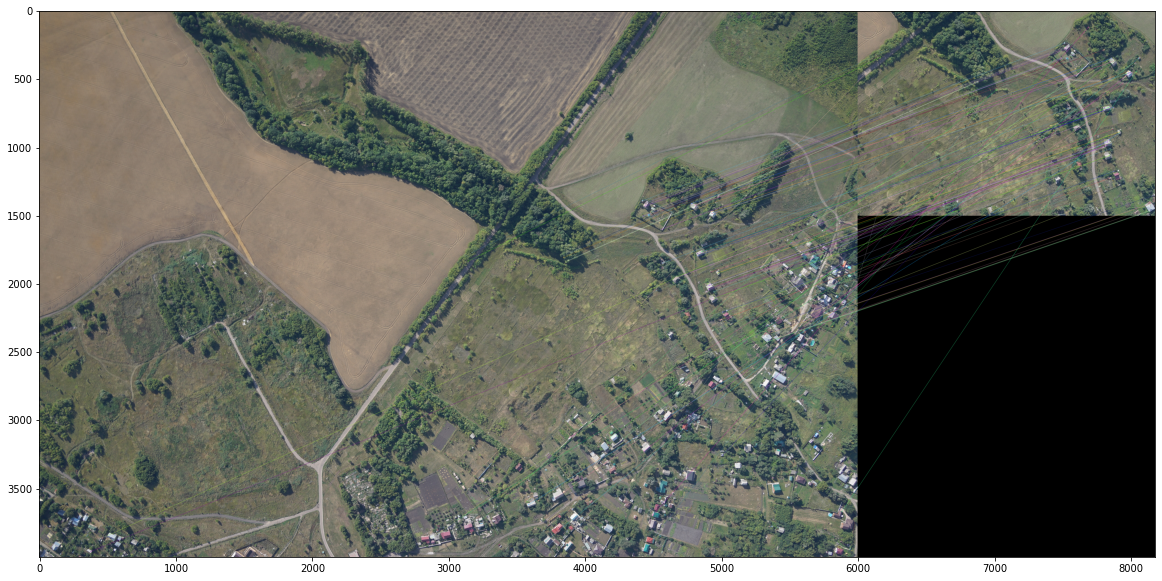

In [44]:
fig = plt.figure(figsize=(20, 20))
ax = fig.add_subplot(111)
ax.imshow(img3)
plt.show()

Другие дискрипторы

**SURF**

In [32]:
orb2 = cv2.xfeatures2d_SURF.create()  #xfeatures2d_SIFT.create()

kp1, des1 = orb2.detectAndCompute(train_image, None)
kp2, des2 = orb2.detectAndCompute(test_image, None)

In [34]:
bf = cv2.BFMatcher()
mathes = bf.knnMatch(des1, des2, k=2)

good = []

for m,n in mathes:
    if m.distance < 0.75*n.distance:
        good.append([m])

img3 = cv2.drawMatchesKnn(train_image, kp1, test_image, kp2, good[:100], None, flags=2)

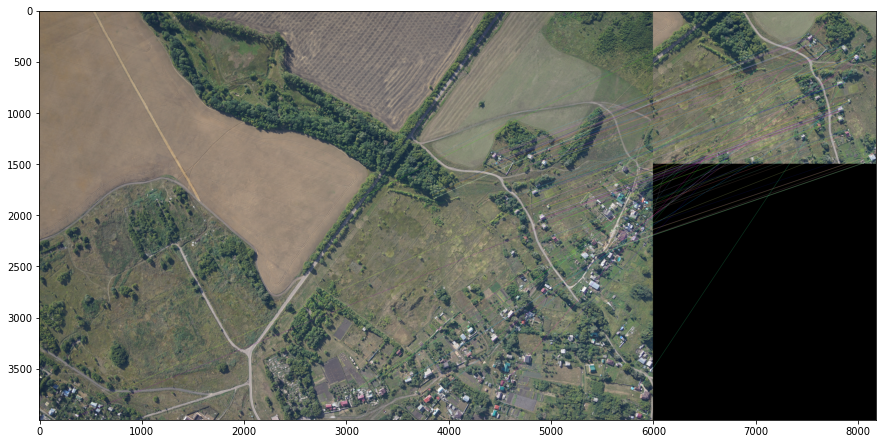

In [36]:
fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(111)
ax.imshow(img3)
plt.show()

In [ ]:
from PIL import Image
im = Image.fromarray(img3)
im.save("/gdrive/My Drive/matching_sift.jpeg")